In [1]:
#Carregando principais bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import treecorr as tr
from astropy.coordinates import cartesian_to_spherical

In [2]:
#Importando o catálogo ALFALFA

data = tr.Catalog('data.dat', x_col='x', y_col='y', z_col='z')

#Importando o catálogo aleatório
rand = tr.Catalog('random_HI.dat', x_col='x', y_col='y', z_col='z')

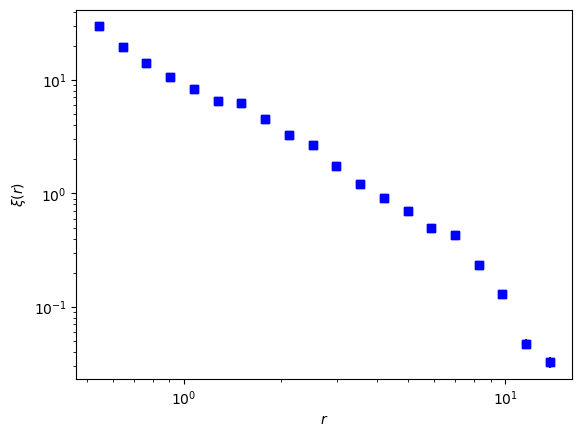

In [3]:
#Calculando as funções de correlação

dd = tr.NNCorrelation(min_sep=0.5, max_sep=15., nbins=20)
dd.process(data)

rr = tr.NNCorrelation(min_sep=0.5, max_sep=15., nbins=20)
rr.process(rand)

dr = tr.NNCorrelation(min_sep=0.5, max_sep=15., nbins=20)
dr.process(data, rand)

r = dd.rnom

#Contando o numero de pares
DD = dr.npairs

#Calculo da função de correlação e obtendo a covariância

xi, varxi = dd.calculateXi(rr=rr, dr=dr)

cov = dd.cov

#Salvando os resultados

S1 = r, xi
    
np.savetxt('xi.dat', np.transpose(S1), delimiter='\t')   
np.savetxt('cov.txt', cov)

#Plot da função de correlação

plt.loglog()
# plt.xlim(0, 20)
# plt.ylim(-0.5, 5)
plt.errorbar(r, xi, yerr=np.sqrt(np.diag(cov)), fmt='s', color='blue')
plt.scatter(r, xi, marker='s', color='blue')
plt.ylabel('$\\xi(r)$')
plt.xlabel('$r$')
plt.savefig('tpcf.pdf', bbox_inches='tight', pad_inches = 0.1)
plt.show()